## PyTorch 선형회귀

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-7-PyTorch_선형회귀.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-7-PyTorch_선형회귀.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

## NumPy 를 이용한 선형회귀

## 최소제곱법으로 구한 해석적 해

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

이제 데이터를 선언합니다. 아래 데이터는 y=2+3x를 가정된 상태에서 만들어진 데이터로 우리는 이미 정답이 W=3, b=2임을 알고 있는 상태입니다. 모델이 이 두 W와 b의 값을 제대로 찾아내도록 하는 것이 목표입니다.

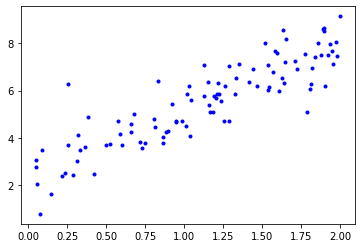

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.show()

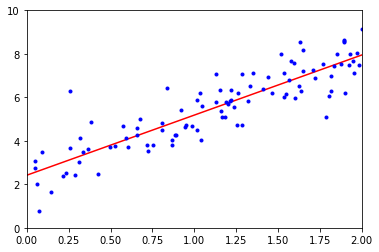

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 10])
plt.show()

## 기울기하강법으로 구한 근사적 해

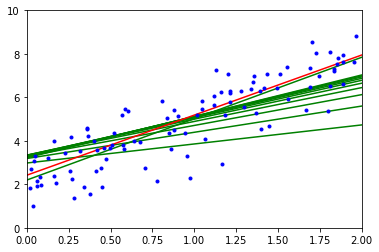

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

eta = 0.1 # learning rate
n_iterations = 500
m = 100
theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict_gd = X_new_b.dot(theta)
    if iteration < 10:
        plt.plot(X_new, y_predict_gd, "g-")
plt.plot(X_new, y_predict_gd, "g-")
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 10])
plt.show()

## PyTorch 를 이용한 선형회귀

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

torch.manual_seed(1)

이제 데이터를 선언합니다. 아래 데이터는 y=2+3x를 가정된 상태에서 만들어진 데이터로 우리는 이미 정답이 W=3, b=2임을 알고 있는 상태입니다. 모델이 이 두 W와 b의 값을 제대로 찾아내도록 하는 것이 목표입니다.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)
#x_train = torch.FloatTensor([[1], [2], [3]])
#y_train = torch.FloatTensor([[2], [4], [6]])
x_train = torch.FloatTensor(X)
y_train = torch.FloatTensor(y)

데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례입니다.
nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.

In [ ]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

위 torch.nn.Linear 인자로 1, 1을 사용하였습니다. 하나의 입력 x에 대해서 하나의 출력 y을 가지므로, 입력 차원과 출력 차원 모두 1을 인수로 사용하였습니다. model에는 가중치 W와 편향 b가 저장되어져 있습니다. 이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있는데, 한 번 출력해보겠습니다.

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


2개의 값이 출력되는데 첫번째 값이 W고, 두번째 값이 b에 해당됩니다. 두 값 모두 현재는 랜덤 초기화가 되어져 있습니다. 그리고 두 값 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.

이제 옵티마이저를 정의합니다. model.parameters()를 사용하여 W와 b를 전달합니다. 학습률(learning rate)은 0.01로 정합니다.

In [ ]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 29.602806
Epoch  100/2000 Cost: 0.975786
Epoch  200/2000 Cost: 0.969191
Epoch  300/2000 Cost: 0.966537
Epoch  400/2000 Cost: 0.964973
Epoch  500/2000 Cost: 0.964051
Epoch  600/2000 Cost: 0.963508
Epoch  700/2000 Cost: 0.963188
Epoch  800/2000 Cost: 0.962999
Epoch  900/2000 Cost: 0.962888
Epoch 1000/2000 Cost: 0.962822
Epoch 1100/2000 Cost: 0.962784
Epoch 1200/2000 Cost: 0.962761
Epoch 1300/2000 Cost: 0.962748
Epoch 1400/2000 Cost: 0.962739
Epoch 1500/2000 Cost: 0.962735
Epoch 1600/2000 Cost: 0.962732
Epoch 1700/2000 Cost: 0.962731
Epoch 1800/2000 Cost: 0.962730
Epoch 1900/2000 Cost: 0.962729
Epoch 2000/2000 Cost: 0.962729


학습이 완료되었습니다. Cost의 값이 매우 작습니다. W와 b의 값도 최적화가 되었는지 확인해봅시다. x에 임의의 값 4를 넣어 모델이 예측하는 y의 값을 확인해보겠습니다.

In [ ]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 3+2x 이므로 입력이 4라면 y가 14에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[14.0863]], grad_fn=<AddmmBackward>)


이제 학습 후의 W와 b의 값을 출력해보겠습니다.

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.0075]], requires_grad=True), Parameter containing:
tensor([2.0562], requires_grad=True)]
